# Project #3 Artificial intelligance (Naive Bayes)
# (Spring 2022)

    Amirmahdi Ansaripour

    Student ID: 810198358

$\textbf{Approach:}$ 

Employing $\textbf{Naive Bayes Classifier}$ to label short texts based on words inside them. First, a dataset containing advertisements from magazines are given. The advertisements are in Persian and belong to four topics (Art and Cinema, Knowledge and Technology, Game, health and beauty). The goal is to predict statements' types in the test data set using $\textbf{Bayes rule}$. i.e.,

$$P(c_i|x) = \frac{P(x|c_i).P(c_i)}{P(x)}$$

Where $x$ is a new word in the test set and $c_i$ is the article type ($i \in \{0, 1, 2, 3\}$). Presumably, $P(c_i) = \frac{1}{4}$. 

### Defining global variables and importing libraries

In [421]:
import pandas as pds
import operator as op
from matplotlib import pyplot as plot
from hazm import *
from math import log



ZERO = 0.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001
dataframe = pds.read_csv('train.csv')
testframe = pds.read_csv('test.csv')
types = ['هنر و سینما', 
         'علم و تکنولوژی',
         'بازی ویدیویی',
         'سلامت و زیبایی']

# variables related to training
art_and_cinema = dict()
science_and_technology = dict()
video_game = dict()
health_and_beauty = dict()
freq_table = [art_and_cinema, science_and_technology, video_game, health_and_beauty]
words_in_each_class = [0] * len(types)
non_repeated = [0] * len(types)

# variables related to testing
y_true = []
y_pred = []
total = len(testframe)
correct_detected = 0
truly_detected = [0] * len(types)
wrongly_detected = [0] * len(types)
wrongly_not_detected = [0] * len(types)
wrongly_labeled = []


lemmatizer = Lemmatizer()
normalizer = Normalizer()
stemmer = Stemmer()

### Defining Stopwords

Puncuations, paranthesis, and to-be verbs (called MASDAR in Persian) do not affect the classification, so it is better to omit them from both train and test datasets.  

In [422]:
stop_words = stopwords_list()
stop_words.append(')')
stop_words.append('(')
stop_words.append(',')
stop_words.append(':')
stop_words.append('.')
stop_words.append('!')
stop_words.append('?')
stop_words.append('ـ')
stop_words.append('-')
stop_words.append('"')
stop_words.append('#')
stop_words.append('*')
stop_words.append('...')
stop_words.append('....')
stop_words.append('/')
stop_words.append('[')
stop_words.append(']')
stop_words.append('،')
stop_words.append('؛')
stop_words.append('؟')
stop_words.append('«')
stop_words.append('»')
stop_words.append('…')
stop_words.append('سال')
stop_words.append('قرار')
stop_words.append('آن‌ها')
stop_words.append('است‌')



### Preprocessing Words Using Hazm Library

$\textbf{Hazm}$ is a library for processing texts in Persian Language. It has useful methods such as $\textbf{stem}$ and $\textbf{lemmatize}$. In addition to removing stop words, these two methods are recommended for pre-processing: 

* Lemmatize: This method replaces a verb with its $\textbf{main root}$. It is useful when a verb is repeated in different tenses, and those tenses do not affect labeling.

* Stem: Ommiting $\textbf{suffixes / prefixes}$ of a word or a verb in order for different words coming from the same root to be labeled the same. 

In [423]:
print("Output of normalizing : ")
normalizer.normalize(dataframe["content"][0][0:100])


Output of normalizing : 


'فیلم\u200cهای در حال اکران؛ موزیکال شاد خاله قورباغه برای بزرگسالان و بچه\u200cها فیلم خاله قورباغه را شاید از'

In [424]:
print("Output of tokenizing : ")
word_tokenize(dataframe["content"][0])

Output of tokenizing : 


['فیلم\u200cهای',
 'در',
 'حال',
 'اکران',
 '؛',
 'موزیکال',
 'شاد',
 'خاله',
 'قورباغه',
 'برای',
 'بزرگسالان',
 'و',
 'بچه\u200cها',
 'فیلم',
 'خاله',
 'قورباغه',
 'را',
 'شاید',
 'از',
 'زمان',
 'تلویزیون',
 'یادتان',
 'باشد',
 '.',
 'کاراکتر',
 'قورباغه',
 'بامزه\u200cای',
 'که',
 'پرحرف',
 'بود',
 'و',
 'دل',
 'مهربانی',
 'داشت',
 'ولی',
 'مدام',
 'خرابکاری',
 'می\u200cکرد',
 '.',
 'قبل\u200cتر',
 'هم',
 'خاله',
 'قورباغه',
 'در',
 'فیلم',
 'کودکانه',
 'گلنار',
 'برای',
 'اولین\u200cبار',
 'به',
 'مخاطبان',
 'معرفی',
 'شده_بود',
 '.',
 'دوست',
 'گلنار',
 'بود',
 'که',
 'در',
 'پختن',
 'کلوچه\u200cها',
 'به',
 'او',
 'کمک',
 'کرد',
 'تا',
 'بتواند',
 'دل',
 'خرسی',
 'خانم',
 'را',
 'به',
 'دست',
 'بیاورد',
 'و',
 'فرار',
 'کند',
 '.',
 'قصه',
 'فیلم',
 'خاله',
 'قورباغه',
 'چیست',
 '؟',
 'خاله',
 'قورباغه',
 'همچنان',
 'همان',
 'کاراکتر',
 'مهربان',
 'را',
 'دارد',
 'که',
 'عاشق',
 'معاشرت',
 'با',
 'همسایه\u200cهایش',
 'و',
 'دیگران',
 'است',
 '.',
 'خاله',
 'قورباغه',
 '۹۸',
 'بچ

In [425]:
print("Output of stemming : ")
print(stemmer.stem("کتاب هایم"))
print(stemmer.stem("انسانیت"))
print(stemmer.stem("سلام"))


Output of stemming : 
کتاب 
انسان
سلا


In [426]:
print("Output of lemmatizing : ")
print(lemmatizer.lemmatize("رفتم"))
print(lemmatizer.lemmatize("می‌روند"))
print(lemmatizer.lemmatize("خوردند"))


Output of lemmatizing : 
رفت#رو
رفت#رو
خورد#خور


In [427]:
def preprocess(text, index):
    tokens = word_tokenize(text)
    result = []
    for i in range(0, len(tokens)):
#         word = stemmer.stem(tokens[i])
        if (tokens[i] not in stop_words):
#             root == Lemmatizer().lemmatize(tokens[i])
            result.append(tokens[i])
    return result

def Train():
    for i in range(len(dataframe)):
        if (isinstance(dataframe.iloc[i, 0], float)):
            continue
        words = preprocess(dataframe.iloc[i, 0], i)
        label = dataframe.iloc[i, 1]
        for word in words:
            if(label == types[0]):
                art_and_cinema[word] = art_and_cinema.get(word, 0) + 1
                words_in_each_class[0] += 1
            elif (label == types[1]):
                science_and_technology[word] = science_and_technology.get(word, 0) + 1
                words_in_each_class[1] += 1
            elif (label == types[2]):
                video_game[word] = video_game.get(word, 0) + 1
                words_in_each_class[2] += 1
            elif (label == types[3]):
                health_and_beauty[word] = health_and_beauty.get(word, 0) + 1
                words_in_each_class[3] += 1

### Finding likelihood

After preprocessing, we should calculate the frequency of the most repeated words in each category.

In [428]:
def plot_chart(items, title):
    sorteditems = dict(sorted(items, key = op.itemgetter(1), reverse = True)[:5])
    keys = sorteditems.keys()
    values = sorteditems.values()
    plot.bar(keys, values)
    plot.xlabel('WORD')
    plot.ylabel('FREQUENCY')
    plot.title(title)
    plot.show()

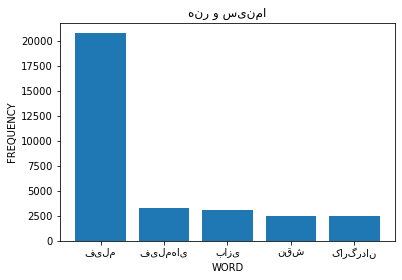

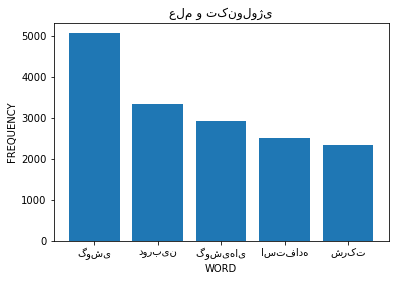

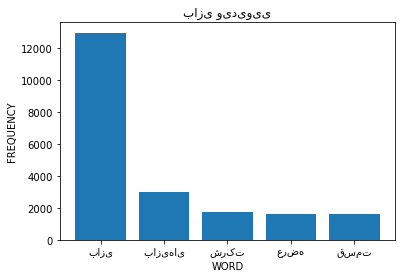

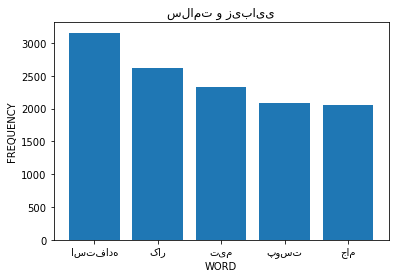

In [429]:
Train()
for i in range(len(types)):
    non_repeated[i] = len(freq_table[i].keys())
    plot_chart(freq_table[i].items(), types[i])


## Bigrams and how they work

Imagine two sentences having a common word but each word has a different meaning. This issue certainly decreases accuracy. How using bigrams helps us solve the matter?

او با قوم و خویش خود به مسافرت رفت

کتاب "شبی با خویش" را خواندم

In the first sentence, خویش means "relatives" and in the second one, means "self". The meanings are detected only by refering to the context, so unigrams aren't sufficient in this case and bigrams (or maybe trigrams) should be used. In this example قوم and it's adjacency to خویش is enough to detect the meaning. 

## Additive smothing

If a particular word ($x_j$) in the current test statement has not appeard in the training set, what will happen?  

$$P(c_i | X) = [P(x_1 | c_i) . P(x_2 | c_i) ... P(x_j | c) ... P(x_n | c_i)] * P(c_i)$$

$$P(x_j | c_i) = 0  \space => \space P(c_i | X) = 0$$

So because of only one word, the posterior probability gets zero.

Additive smothing simply adds a constant $\alpha > 0$ :

(If $\alpha$ equals zero, no additive smothing is used)

$$P(x_j | c_i) = \frac{\text{count}(x_j, c_i) + \alpha}{\Sigma_i \text{count}(x_j, c_i) + \alpha.|V|}$$
    
Where $V$ is the set containing words causing the zero-probability problem.

## Evaluation

$    \text{Precision}_i = \frac{\text{|Correctly-detected instances of label i|}} {\text{|All instances labeled i|}}$

$    \text{Recall}_i = \frac{\text{|Correctly-detected instances of label i|}} {\text{|All instances of label i in reality|}}$

$     \text{F1-score} = \frac{2 * precision * recall}{precision + recall}$

Explain why both of these parameters are vital for our estimation.

Imagine a classificier detecting all samples having label 1. this estimation has 100% recall but lacks precision. 

Imagine a classifier detecting only one instance to belong to 1st class. It has a 100% precision but very low recall.

To mitigate the trade-off, the F1-score has been introduced.

### Testing Phase

In [430]:
def test_new_input(text, k):
    words = word_tokenize(text)
    probs = [0] * len(types)
    for word in words:
        if word in stop_words:
            continue
        for i in range(len(types)):
            probs[i] += log((freq_table[i].get(word, 0) + k) / (words_in_each_class[i] + k * non_repeated[i]))
    return probs    

In [431]:
def Test(k):
    for i in range(len(testframe)):
        probs_of_input = test_new_input(testframe.iloc[i, 0], k)
        label = testframe.iloc[i, 1]
        max_value = max(probs_of_input)
        detected_index = probs_of_input.index(max_value, 0)
        label_index = types.index(label, 0)
        global y_pred
        y_pred.append(detected_index)
        global y_true
        y_true.append(label_index)
        if (label_index == detected_index):
            global correct_detected
            correct_detected += 1
            global truly_detected
            truly_detected[detected_index] += 1
        else:
            global wrongly_detected
            wrongly_detected[detected_index] += 1
            global wrongly_not_detected
            wrongly_not_detected[label_index] += 1
            if k != ZERO : 
                global worngly_labeled
                wrongly_labeled.append((i, detected_index))

In [432]:
def other_means(precisions, recalls, F1s):
    sum_of_truly_detected = sum(truly_detected)
    sum_of_wrongly_detected = sum(wrongly_detected)
    sum_of_wrongly_not_detected = sum(wrongly_not_detected)
    micro_precision = sum_of_truly_detected / (sum_of_truly_detected + sum_of_wrongly_detected)
    micro_recall = sum_of_truly_detected / (sum_of_truly_detected + sum_of_wrongly_not_detected)
    micro_F1 = 2 * micro_recall * micro_precision / (micro_precision + micro_recall)
    print("Micro precision : ", micro_precision)
    print("Micro recall : ", micro_recall)
    print("Micro F1 : ", micro_F1, '\n\n')
    macro_precision = sum(precisions) / len(types)
    macro_recall = sum(recalls) / len(types)
    macro_F1 = sum(F1s) / len(types)
    print("Macro precision : ", macro_precision)
    print("Macro recall : ", macro_recall)
    print("Macro F1 : ", macro_F1, '\n\n')
    freqs = [0] * len(types)
    for i in range(len(testframe)):
        label = testframe.iloc[i, 1]
        freqs[types.index(label, 0)] += 1
    weighted_precision = 0
    weighted_recall = 0
    weighted_F1 = 0
    for i in range(len(freqs)):
        weighted_precision += (freqs[i] * precisions[i])
        weighted_recall += (freqs[i] * recalls[i])
        weighted_F1 += (freqs[i] * F1s[i]) 
    print("Weighted precision : ", weighted_precision / total)
    print("Weighted recall : ", weighted_recall / total)
    print("Weighted F1 : ", weighted_F1 / total, '\n\n')

In [433]:
def reset():
    global correct_detected
    correct_detected = 0
    global truly_detected
    truly_detected = [0] * len(types)
    global wrongly_detected
    wrongly_detected = [0] * len(types)
    global wrongly_not_detected
    wrongly_not_detected = [0] * len(types)
    global y_true
    y_true = []
    global y_pred
    y_pred = []
    
def evaluate():
    precisions = [0] * len(types)
    recalls = [0] * len(types)
    F1s = [0] * len(types)
    accuracy = correct_detected / total
    print("Accuracy : ", accuracy , '\n\n')
    for i in range(len(types)):
        precisions[i] = truly_detected[i] / (truly_detected[i] + wrongly_detected[i])
        recalls[i] = truly_detected[i] / (truly_detected[i] + wrongly_not_detected[i])
        F1s[i] = 2 * precisions[i] * recalls[i] / (precisions[i] + recalls[i])
        print("Label : ", types[i])
        print("Precision : ", precisions[i])
        print("Recall : ", recalls[i])
        print("F1 : ", F1s[i], '\n\n\n')
    other_means(precisions, recalls, F1s)

### Part 1: Using additive smoothing

In [434]:
additive_smoothing = 1
print("Using additive smoothing\n")
reset()
Test(additive_smoothing)
evaluate()

Using additive smoothing

Accuracy :  0.9588528678304239 


Label :  هنر و سینما
Precision :  0.9580838323353293
Recall :  0.9580838323353293
F1 :  0.9580838323353293 



Label :  علم و تکنولوژی
Precision :  0.9540636042402827
Recall :  0.9747292418772563
F1 :  0.9642857142857143 



Label :  بازی ویدیویی
Precision :  0.96875
Recall :  0.9441624365482234
F1 :  0.9562982005141389 



Label :  سلامت و زیبایی
Precision :  0.95625
Recall :  0.9503105590062112
F1 :  0.9532710280373832 



Micro precision :  0.9588528678304239
Micro recall :  0.9588528678304239
Micro F1 :  0.9588528678304239 


Macro precision :  0.959286859143903
Macro recall :  0.956821517441755
Macro F1 :  0.9579846937931414 


Weighted precision :  0.9589471550804965
Weighted recall :  0.9588528678304239
Weighted F1 :  0.9588211020853453 




In [435]:
print("Tested by classification report\n\n")
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=types))

Tested by classification report


                precision    recall  f1-score   support

   هنر و سینما       0.96      0.96      0.96       167
علم و تکنولوژی       0.95      0.97      0.96       277
  بازی ویدیویی       0.97      0.94      0.96       197
سلامت و زیبایی       0.96      0.95      0.95       161

      accuracy                           0.96       802
     macro avg       0.96      0.96      0.96       802
  weighted avg       0.96      0.96      0.96       802



### Part 2: Without additive smoothing

In [436]:
additive_smoothing = 0
print("Not using additive smoothing \n")
reset()
Test(additive_smoothing)
evaluate()

Not using additive smoothing 

Accuracy :  0.9376558603491272 


Label :  هنر و سینما
Precision :  0.9213483146067416
Recall :  0.9820359281437125
F1 :  0.9507246376811593 



Label :  علم و تکنولوژی
Precision :  0.9730769230769231
Recall :  0.9133574007220217
F1 :  0.9422718808193669 



Label :  بازی ویدیویی
Precision :  0.973404255319149
Recall :  0.9289340101522843
F1 :  0.9506493506493507 



Label :  سلامت و زیبایی
Precision :  0.8636363636363636
Recall :  0.9440993788819876
F1 :  0.9020771513353115 



Micro precision :  0.9376558603491272
Micro recall :  0.9376558603491272
Micro F1 :  0.9376558603491272 


Macro precision :  0.9328664641597944
Macro recall :  0.9421066794750015
Macro F1 :  0.9364307551212971 


Weighted precision :  0.9404159215398511
Weighted recall :  0.9376558603491272
Weighted F1 :  0.9380207841928 




In [437]:
print("Tested by classification report\n\n")
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=types))

Tested by classification report


                precision    recall  f1-score   support

   هنر و سینما       0.92      0.98      0.95       167
علم و تکنولوژی       0.97      0.91      0.94       277
  بازی ویدیویی       0.97      0.93      0.95       197
سلامت و زیبایی       0.86      0.94      0.90       161

      accuracy                           0.94       802
     macro avg       0.93      0.94      0.94       802
  weighted avg       0.94      0.94      0.94       802



### Misclassifications

Now, fives pharagraphs wrongly labeled are discussed. 

The instnces are shown below. One reason is that some frequently used words in a topic are also repeated in another one (the unigrame problem mentioned earlier).(The first three examples are associated to this issue)

In [438]:
for i in range(5):
    (pos_in_test, our_detection) = wrongly_labeled[i]
    print("Our detection : ", types[our_detection])
    print("True class : ", testframe.iloc[pos_in_test, 1])
    print(testframe.iloc[pos_in_test, 0], "\n\n\n")

Our detection :  علم و تکنولوژی
True class :  سلامت و زیبایی
این افزونه‌ موبایل با دقت ۹۹ درصد سرطان را تشخیص می‌دهد محققان توانسته‌اند یک طیف سنج قابل حمل برای تلفن‌های همراه هوشمند تولید کنند که می‌تواند با دقت ۹۹ درصد سرطان را تشخیص دهد و به پزشکان اجازه می‌دهد که از بیماری مریض‌شان باخبر شوند. این دستگاه با بررسی کردن نمونه بافت اینترلوکین ۶ که یکی از اینترلوکین‌های مهم بدن است و از گلبولهای سفید ترشح می‌شود و ارتباط نزدیکی با ریه، پروستات و کبد دارد، متوجه سرطان ‌می‌شود. البته باید به این موضوع اشاره کنیم که این دستگاه اولین طیف سنج قابل حملی نیست که برای موبایل طراحی شده، اما می‌تواند هشت نمونه را در یک لحظه با هم بررسی کند و این موضوع باعث می‌شود که پزشکان بدون حضور در بیمارستان هم بتوانند به بیماران خودشان کمک کنند. این دستگاه برای بیمارستان و کلینیک‌هایی که آزمایشگاه ندارند بسیار مناسب خواهد بود و به افراد اجازه می‌دهد که بتوانند به سرعت نمونه‌های مختلف را بررسی کنند. در این روش طیف سنجی که تلفن‌های همراه هوشمند از آن استفاده می‌کنند از تکنیکی با نام (ELISA) یا تست الیزا استفا

### Conclusion 

We've learned how Naive Bayes can be helpful for classifying texts.

What's more, we've measured some parameters for our model showing how accurate it is, such as recall, precision, f1, micro and macro and weighted forms of them.

### Refrences

https://towardsdatascience.com/multi-class-metrics-made-simple-part-ii-the-f1-score-ebe8b2c2ca1

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html